# Task 5 - Traffic Accident Analysis

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
data = pd.read_csv('RTA Dataset.csv')

In [3]:
data.shape

(12316, 32)

In [4]:
data.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


## Step 1 : Preprocessing

In [5]:
# Preprocessing
# Convert 'Time' to datetime and extract the hour

data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S', errors='coerce')
data['Hour'] = data['Time'].dt.hour

In [6]:
# Fill missing values in critical columns
data['Road_surface_conditions'].fillna('Unknown', inplace=True)
data['Weather_conditions'].fillna('Unknown', inplace=True)

In [7]:
# Drop rows with invalid time entries
data.dropna(subset=['Hour'], inplace=True)


In [8]:
data.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour
0,1900-01-01 17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,17
1,1900-01-01 17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,17
2,1900-01-01 17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,17
3,1900-01-01 01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1
4,1900-01-01 01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,1


## Step 2 : Analysis and Visualizations

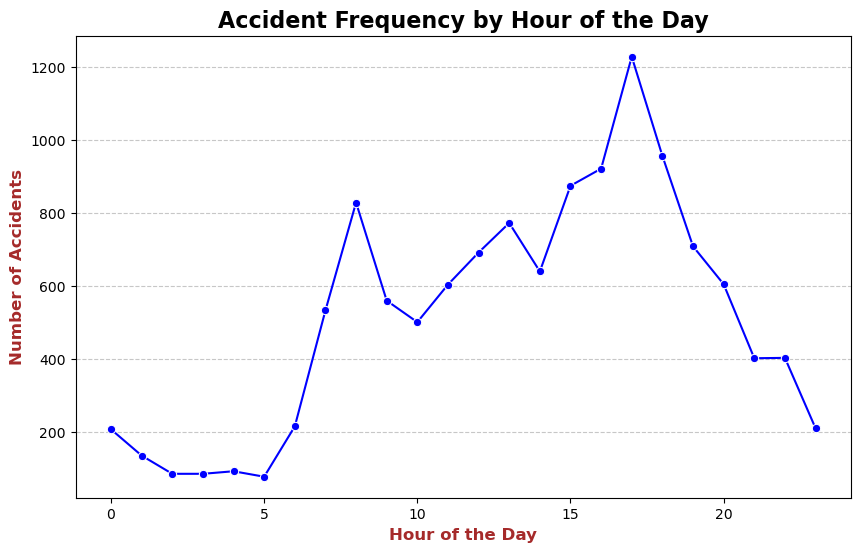

In [9]:
plt.figure(figsize=(10, 6))
accidents_by_hour = data['Hour'].value_counts().sort_index()
sns.lineplot(x=accidents_by_hour.index, y=accidents_by_hour.values, marker='o', color='b')
plt.title("Accident Frequency by Hour of the Day", fontsize=16,fontweight='bold')
plt.xlabel("Hour of the Day", fontsize=12,fontweight='bold',color='brown')
plt.ylabel("Number of Accidents", fontsize=12,fontweight='bold',color='brown')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

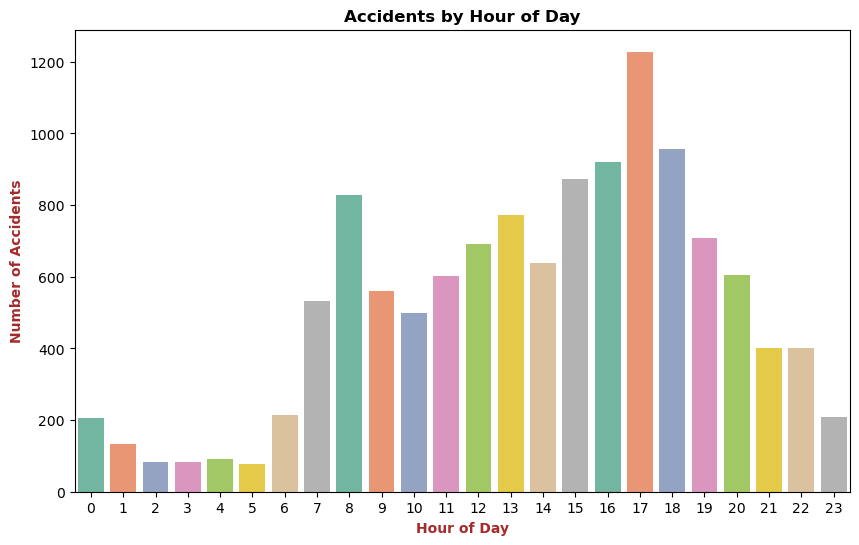

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x=data['Time'].dt.hour, palette='Set2')
plt.title('Accidents by Hour of Day',fontweight='bold')
plt.xlabel('Hour of Day',fontweight='bold',color='brown')
plt.ylabel('Number of Accidents',fontweight='bold',color='brown')
plt.show()

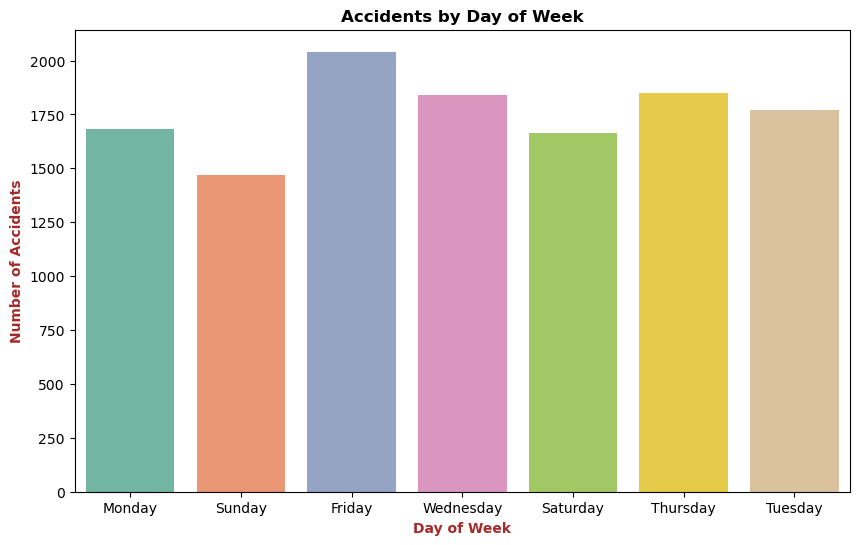

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Day_of_week', data=data, palette='Set2')
plt.title('Accidents by Day of Week',fontweight='bold')
plt.xlabel('Day of Week',fontweight='bold',color='brown')
plt.ylabel('Number of Accidents',fontweight='bold',color='brown')
plt.show()

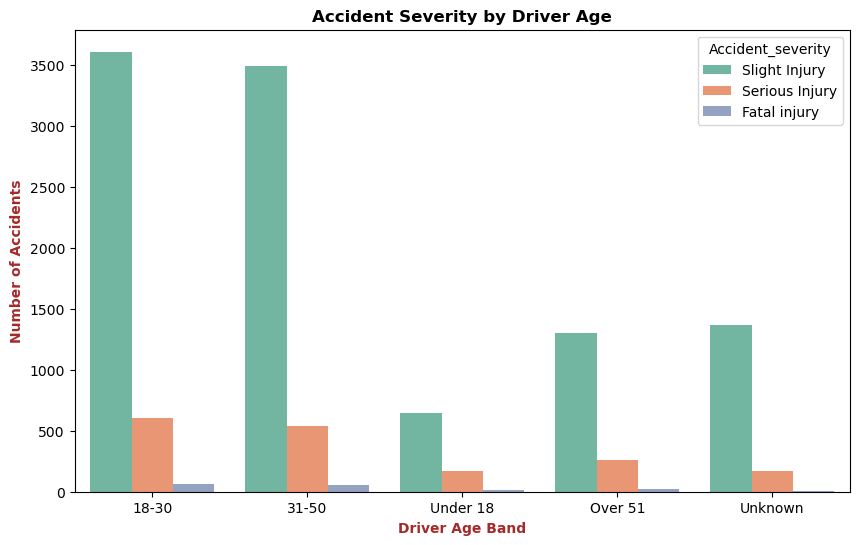

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age_band_of_driver', hue='Accident_severity', data=data, palette='Set2')
plt.title('Accident Severity by Driver Age',fontweight='bold')
plt.xlabel('Driver Age Band',fontweight='bold',color='brown')
plt.ylabel('Number of Accidents',fontweight='bold',color='brown')
plt.show()

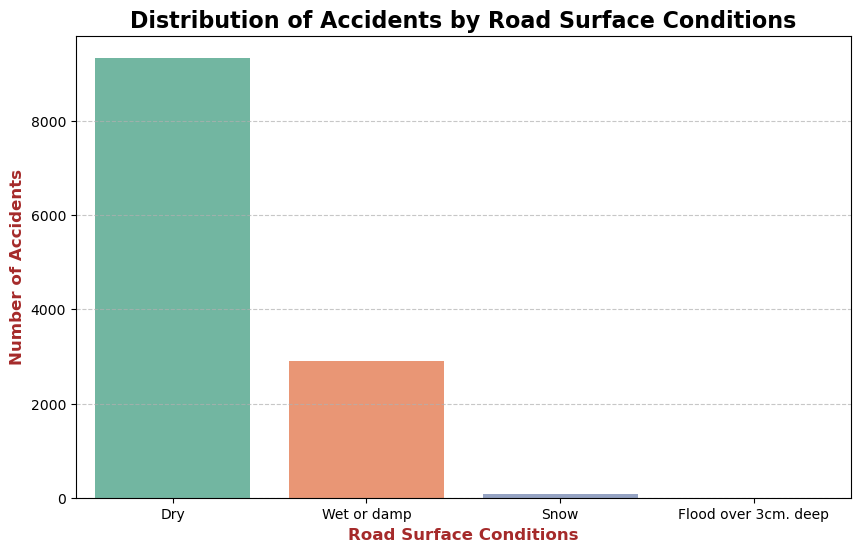

In [13]:
plt.figure(figsize=(10, 6))
road_conditions = data['Road_surface_conditions'].value_counts()
sns.barplot(x=road_conditions.index, y=road_conditions.values, palette="Set2")
plt.title("Distribution of Accidents by Road Surface Conditions", fontsize=16,fontweight='bold')
plt.xlabel("Road Surface Conditions", fontsize=12,fontweight='bold',color='brown')
plt.ylabel("Number of Accidents", fontsize=12,fontweight='bold',color='brown')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

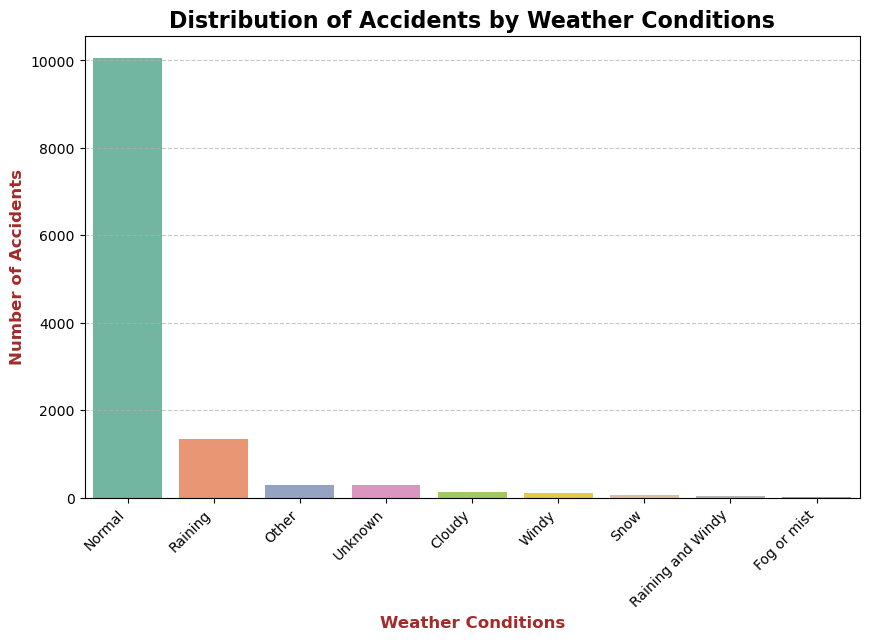

In [14]:
plt.figure(figsize=(10, 6))
weather_conditions = data['Weather_conditions'].value_counts()
sns.barplot(x=weather_conditions.index, y=weather_conditions.values, palette="Set2")
plt.title("Distribution of Accidents by Weather Conditions", fontsize=16,fontweight='bold')
plt.xlabel("Weather Conditions", fontsize=12,fontweight='bold',color='brown')
plt.ylabel("Number of Accidents", fontsize=12,fontweight='bold',color='brown')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

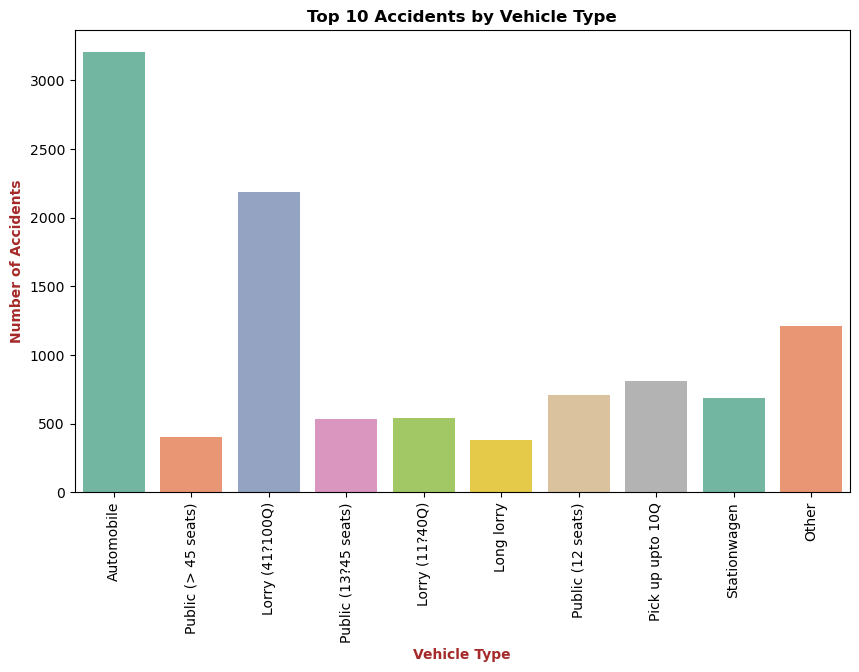

In [15]:
vehicle_counts = data['Type_of_vehicle'].value_counts().head(10)  # Top 10 vehicle types
plt.figure(figsize=(10, 6))
sns.countplot(x='Type_of_vehicle', data=data[data['Type_of_vehicle'].isin(vehicle_counts.index)], palette='Set2')
plt.title('Top 10 Accidents by Vehicle Type',fontweight='bold')
plt.xlabel('Vehicle Type',fontweight='bold',color='brown')
plt.ylabel('Number of Accidents',fontweight='bold',color='brown')
plt.xticks(rotation=90)
plt.show()

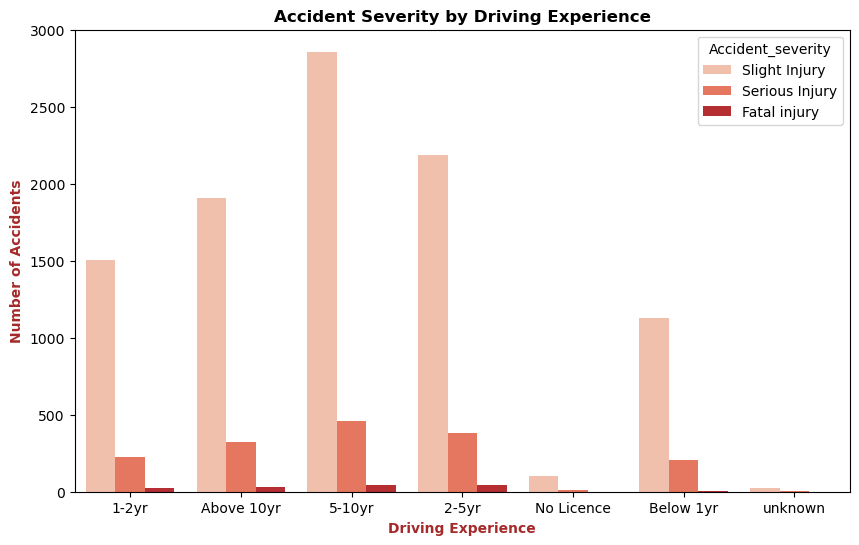

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Driving_experience', hue='Accident_severity', data=data, palette='Reds')
plt.title('Accident Severity by Driving Experience',fontweight='bold')
plt.xlabel('Driving Experience',fontweight='bold',color='brown')
plt.ylabel('Number of Accidents',fontweight='bold',color='brown')
plt.show()